# **DAT565E-Deep Learning for Prediction of Business Outcomes**

<div class="LI-profile-badge"  data-version="v1" data-size="large" data-locale="en_US" data-type="horizontal" data-theme="light" data-vanity="drsalihtutun"><a class="LI-simple-link" href='https://www.linkedin.com/in/drsalihtutun/en-us?trk=profile-badge'>Salih Tutun, PhD</a></div>

![Imgur](https://i.imgur.com/4HJknC2.png)

In [ ]:
import keras
keras.__version__

'2.4.3'

## **Topic Modelling in Business**

- Discovering the abstract of topic in contents. 
- We can understand what is the topic related your positive and nagative feedback.
- Search Engine Optimization (SEO) for marketing

![Imgur](https://i.imgur.com/F4eorBK.png)

- Manage unstructured documents and information in business
- Filters out unneccessary content
- Understand costumer behavior by classifying conversations
- It helps to make a better Customer Relationship Management (CRM) and Content Marketing

### Classifying Reuters Newswire Topics (as a Content Classification)

- In this section, we will build a network to classify Reuters newswires into 46 different mutually-exclusive topics. 
- Because we have many classes, this problem is an instance of "multi-class classification". If each data point could have 
belonged to multiple categories (in our case, topics) then we would be facing a "multi-label, multi-class classification" problem.

### The Reuters Dataset


- The _Reuters dataset_, a set of short newswires and their topics, published by Reuters in 1986.
- There are 46 different topics; some topics are more represented than others.

- The Reuters dataset comes packaged as part of Keras. Let's take a look right away:

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

The argument `num_words=10000` restricts the data to the 10,000 most frequently occurring words found in the 
data.

We have 8,982 training examples and 2,246 test examples:

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

As with the IMDB reviews, each example is a list of integers (word indices):

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Decode it back to words:

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

The label associated with an example is an integer between 0 and 45: a topic index.

In [ ]:
train_labels[10]

3

### Preparing the data

Vectorize the data:

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)


To vectorize the labels, there are two possibilities: 

- We could just cast the label list as an integer tensor, 

- Or we could use a "one-hot" encoding. 
 
In our case, one-hot encoding of our labels consists in embedding each label as an all-zero vector with a 1 in the place of the label index, e.g.:

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

Note that there is a built-in way to do this in Keras, which you have already seen in action in our MNIST example:

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Building our network


- This topic classification problem looks very similar to our previous movie **review classification problem**: in both cases, we are trying to 
classify short snippets of text. 
- There is however a new constraint here: **the number of output classes** has gone from **2 to 46**, i.e. the dimensionality of the output space is much larger. 

Let's go with 64 units:

Credit: *Chollet, Francois. Deep Learning with Python* 

![Imgur](https://i.imgur.com/UK523Ne.png)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


- We are ending the network with a `Dense` layer of size 46. This means that for each input sample, our network will output a 
46-dimensional vector. 
- The last layer uses a `softmax` activation. It means that the network will 
output a _probability distribution_ over the 46 different output classes, i.e. for every input sample, the network will produce a 
46-dimensional output vector where `output[i]` is the probability that the sample belongs to class `i`. The 46 scores will sum to 1.

- The best loss function to use in this case is `categorical_crossentropy`.

Credit: *Chollet, Francois. Deep Learning with Python* 

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validating our approach

Let's set apart 1,000 samples in our training data to use as a validation set:

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Now let's train our network for 20 epochs:

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4232 - accuracy: 0.8758 - val_loss: 2.0081 - val_accuracy: 0.7100
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4136 - accuracy: 0.8745 - val_loss: 2.0268 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4094 - accuracy: 0.8775 - val_loss: 2.1753 - val_accuracy: 0.7020
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4045 - accuracy: 0.8767 - val_loss: 2.1561 - val_accuracy: 0.7070
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.3957 - accuracy: 0.8796 - val_loss: 2.1006 - val_accuracy: 0.7000
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.3900 - accuracy: 0.8819 - val_loss: 2.1953 - val_accuracy: 0.7090
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.3843 - accuracy: 0.8830 - val_loss: 2.1828 - val_accuracy: 0.7040
Epoch 8/20
16

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's display its loss and accuracy curves:

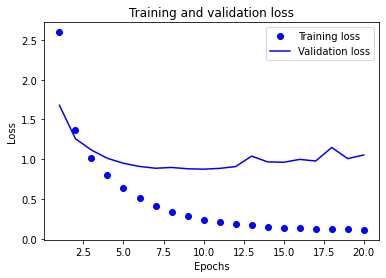

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

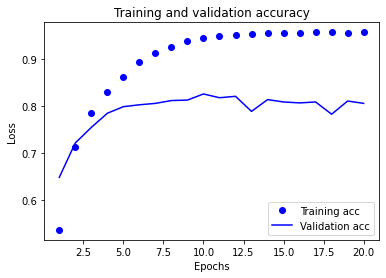

In [ ]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

It seems that the network starts overfitting **after 8 epochs**. Let's train a new network from scratch for 8 epochs, then let's evaluate it on 
the test set:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 51ms/step - loss: 2.5384 - accuracy: 0.5348 - val_loss: 1.6617 - val_accuracy: 0.6520
Epoch 2/8
16/16 [==============================] - 1s 43ms/step - loss: 1.3624 - accuracy: 0.7186 - val_loss: 1.2716 - val_accuracy: 0.7110
Epoch 3/8
16/16 [==============================] - 1s 43ms/step - loss: 1.0125 - accuracy: 0.7830 - val_loss: 1.1379 - val_accuracy: 0.7640
Epoch 4/8
16/16 [==============================] - 1s 44ms/step - loss: 0.8012 - accuracy: 0.8287 - val_loss: 1.0327 - val_accuracy: 0.7870
Epoch 5/8
16/16 [==============================] - 1s 44ms/step - loss: 0.6385 - accuracy: 0.8648 - val_loss: 0.9695 - val_accuracy: 0.7880
Epoch 6/8
16/16 [==============================] - 1s 44ms/step - loss: 0.5117 - accuracy: 0.8939 - val_loss: 0.9137 - val_accuracy: 0.8200
Epoch 7/8
16/16 [==============================] - 1s 44ms/step - loss: 0.4123 - accuracy: 0.9134 - val_loss: 0.9016 - val_accuracy: 0.8080
Epoch 8/8
71/71 [===

In [ ]:
results

[0.9802131056785583, 0.7836152911186218]


Our approach reaches an accuracy of ~78%.

In [ ]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1829919857524488

### Generating predictions on new data

We can verify that the `predict` method of our model instance returns a probability distribution over all 46 topics. Let's generate topic 
predictions for all of the test data:

In [ ]:
predictions = model.predict(x_test)

Each entry in `predictions` is a vector of length 46:

In [ ]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1:

In [ ]:
np.sum(predictions[0])

1.0

The largest entry is the predicted class, i.e. the class with the highest probability:

In [ ]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

We mentioned earlier that another way to encode the labels would be to cast them as an integer tensor, like such:

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)


The only thing it would change is the choice of the loss function. Our previous loss, `categorical_crossentropy`, expects the labels to 
follow a categorical encoding. With integer labels, we should use `sparse_categorical_crossentropy`:

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

This new loss function is still mathematically the same as `categorical_crossentropy`; it just has a different interface.

### On the importance of having sufficiently large intermediate layers


- We mentioned earlier that since our final outputs were 46-dimensional, we should avoid intermediate layers with much less than 46 hidden 
units. 
- Now let's try to see what happens when we introduce an information bottleneck by having intermediate layers significantly less than 46-dimensional, e.g. 5-dimensional.

Credit: *Chollet, Francois. Deep Learning with Python* 

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 19ms/step - loss: 2.7623 - accuracy: 0.2207 - val_loss: 2.0982 - val_accuracy: 0.5470
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 1.7575 - accuracy: 0.5738 - val_loss: 1.6401 - val_accuracy: 0.5830
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 1.4392 - accuracy: 0.5943 - val_loss: 1.4900 - val_accuracy: 0.6240
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.2527 - accuracy: 0.6668 - val_loss: 1.4035 - val_accuracy: 0.6720
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1052 - accuracy: 0.7195 - val_loss: 1.3917 - val_accuracy: 0.6820
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 0.9937 - accuracy: 0.7513 - val_loss: 1.3624 - val_accuracy: 0.6950
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.9033 - accuracy: 0.7823 - val_loss: 1.3266 - val_accuracy: 0.7030
Epoch 8/20
63


Our network now seems to peak at ~72% test accuracy, a 7% absolute drop. This drop is mostly due to the fact that we are now trying to 
compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is 
too low-dimensional. The network is able to cram _most_ of the necessary information into these 8-dimensional representations, but not all 
of it.

Credit: *Chollet, Francois. Deep Learning with Python* 

### Further experiments

* Try using larger or smaller layers: 32 units, 128 units...
* We were using two hidden layers. Now try to use a single hidden layer, or three hidden layers.

### Wrapping up


Here's what you should take away from this example:

- If you are trying to classify data points between N classes, your network should end with a `Dense` layer of size N.
- In a single-label, multi-class classification problem, your network should end with a `softmax` activation, so that it will output a 
probability distribution over the N output classes.
- _Categorical crossentropy_ is almost always the loss function you should use for such problems. It minimizes the distance between the 
probability distributions output by the network, and the true distribution of the targets.
- There are two ways to handle labels in multi-class classification:
    - Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using `categorical_crossentropy` as your loss 
function.
    - Encoding the labels as integers and using the `sparse_categorical_crossentropy` loss function.
- If you need to classify data into a large number of categories, then you should avoid creating information bottlenecks in your network by having 
intermediate layers that are too small.

Credit: *Chollet, Francois. Deep Learning with Python* 